In [321]:
# https://www.kaggle.com/datasets/mariazhokhova/higher-education-students-performance-evaluation?resource=download

In [322]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import pickle

In [323]:
# Show all columns.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

In [324]:
df = pd.read_csv('/Users/jacobseol/PycharmProjects/comp_4949/Assignment2/DATA.csv', delimiter = ';')
print(df.head().transpose())

                                     0         1         2         3         4
student_id                    STUDENT1  STUDENT2  STUDENT3  STUDENT4  STUDENT5
age                                  2         2         2         1         2
sex                                  2         2         2         1         2
graduated_h_school_type              3         3         2         1         1
scholarship_type                     3         3         3         3         3
additional_work                      1         1         2         1         2
activity                             2         2         2         2         2
partner                              2         2         2         1         1
total_salary                         1         1         2         2         3
transport                            1         1         4         1         1
accomodation                         1         1         2         2         4
mother_ed                            1         2    

***** Correlation between predictor variables and grade *****
sex                             0.335533
grade_previous                  0.315493
grade_expected                  0.248588
reading_non_scientific          0.195617
additional_work                 0.167445
discussion_improves_interest    0.146547
course_id                       0.142166
flip_classrom                   0.110617
graduated_h_school_type         0.104821
listenning                      0.085137
siblings                        0.084470
preparation_midterm_time        0.073783
parental_status                 0.066379
mother_ed                       0.066318
farther_ed                      0.063504
taking_notes                    0.044862
scholarship_type                0.023963
accomodation                    0.023683
preparation_midterm_company     0.014638
reading_scientific              0.003189
mother_occup                   -0.030747
weekly_study_hours             -0.033065
father_occup                   -0.04

/var/folders/p0/zxsdjkf57tj1__m_8jw12kvc0000gn/T/ipykernel_12142/3504396227.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


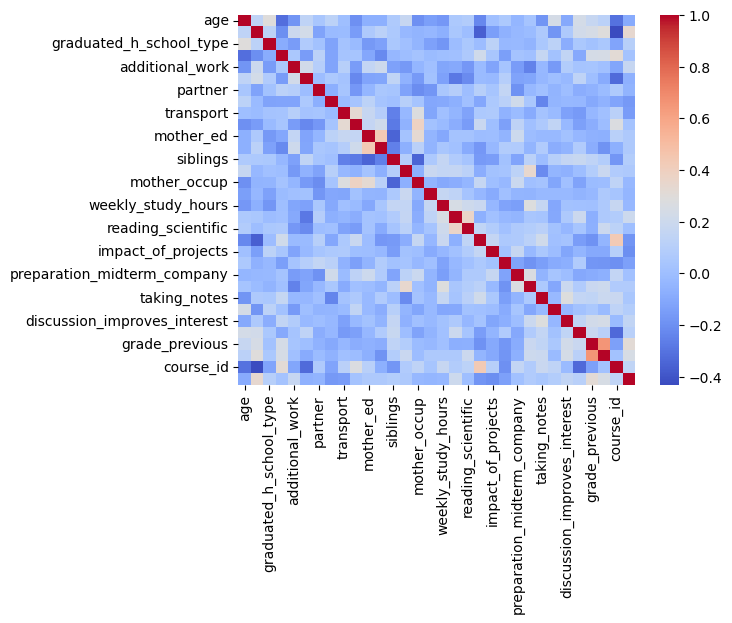

In [325]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

corr_grade = corr_matrix["grade"].drop("grade")
corr_grade = corr_grade.sort_values(ascending=False)
print(f'{"*" * 5} Correlation between predictor variables and grade {"*" * 5}')
print(corr_grade)

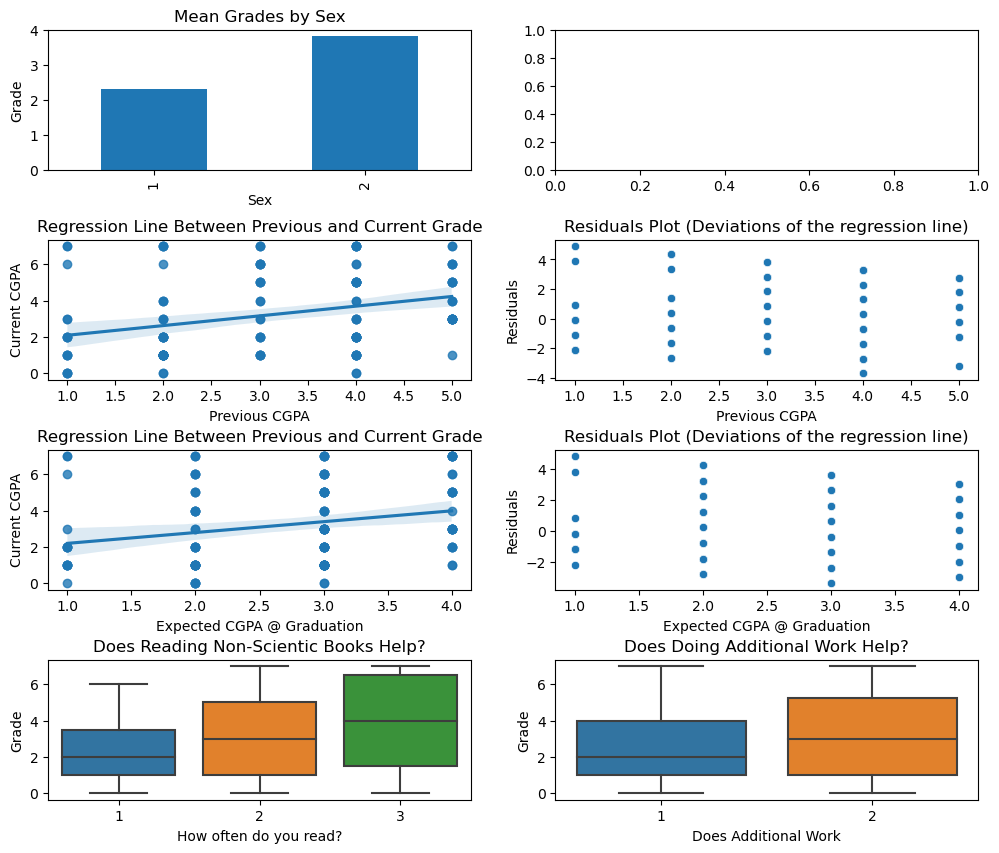

In [326]:
fig, subplot = plt.subplots(nrows=4, ncols=2, figsize=(12, 10), gridspec_kw={'hspace': 0.5})

# First subplot
gender_grade = df.groupby('sex')['grade'].mean()
gender_grade.plot(kind='bar', ax=subplot[0][0])

# 1 - female | 2 - male
subplot[0][0].set_title('Mean Grades by Sex')
subplot[0][0].set_xlabel('Sex')
subplot[0][0].set_ylabel('Grade')

# Second subplot
sns.regplot(x='grade_previous', y='grade', data=df, ax=subplot[1][0])

subplot[1][0].set_title('Regression Line Between Previous and Current Grade')
subplot[1][0].set_xlabel('Previous CGPA')
subplot[1][0].set_ylabel('Current CGPA')

# Third subplot
residuals = df['grade'] - df['grade_previous'] * np.polyfit(df['grade_previous'], df['grade'], 1)[0] - np.polyfit(df['grade_previous'], df['grade'], 1)[1]
sns.scatterplot(x=df['grade_previous'], y=residuals, ax=subplot[1][1])

subplot[1][1].set_title('Residuals Plot (Deviations of the regression line)')
subplot[1][1].set_xlabel('Previous CGPA')
subplot[1][1].set_ylabel('Residuals')

# Fourth subplot
sns.regplot(x='grade_expected', y='grade', data=df, ax=subplot[2][0])

subplot[2][0].set_title('Regression Line Between Previous and Current Grade')
subplot[2][0].set_xlabel('Expected CGPA @ Graduation')
subplot[2][0].set_ylabel('Current CGPA')

# Fifth subplot
residuals = df['grade'] - df['grade_expected'] * np.polyfit(df['grade_expected'], df['grade'], 1)[0] - np.polyfit(df['grade_expected'], df['grade'], 1)[1]
sns.scatterplot(x=df['grade_expected'], y=residuals, ax=subplot[2][1])

subplot[2][1].set_title('Residuals Plot (Deviations of the regression line)')
subplot[2][1].set_xlabel('Expected CGPA @ Graduation')
subplot[2][1].set_ylabel('Residuals')

# Sixth subplot
sns.boxplot(x='reading_non_scientific', y='grade', data=df, ax=subplot[3][0])

# 1 - None | 2 - Sometimes | 3 - Often
subplot[3][0].set_title('Does Reading Non-Scientic Books Help?')
subplot[3][0].set_xlabel('How often do you read?')
subplot[3][0].set_ylabel('Grade')

# Seven subplot
sns.boxplot(x='additional_work', y='grade', data=df, ax=subplot[3][1])

# 1 - Yes | 2 - No
subplot[3][1].set_title('Does Doing Additional Work Help?')
subplot[3][1].set_xlabel('Does Additional Work')
subplot[3][1].set_ylabel('Grade')

plt.show()

In [327]:
# Basic logistic regression -> Very poor performance

X = df.drop(['grade', 'student_id'], axis=1)
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=100000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.56      0.45      0.50        11
           2       0.33      0.40      0.36         5
           3       0.17      0.11      0.13         9
           4       0.00      0.00      0.00         3
           5       0.29      0.40      0.33         5
           6       0.25      0.25      0.25         4
           7       0.50      0.14      0.22         7

    accuracy                           0.27        44
   macro avg       0.26      0.22      0.23        44
weighted avg       0.35      0.27      0.29        44



/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [328]:
# Logistic regression with RFE

selector = RFE(model, n_features_to_select=15)
selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]
for index, feature in enumerate(selected_features):
    print(f'{index + 1}. {feature}')

X_best = df[['age', 'sex', 'graduated_h_school_type', 'additional_work', 'activity', 'partner', 'accomodation', 'reading_non_scientific', 'reading_scientific', 'impact_of_projects', 'attendances_classes', 'taking_notes', 'grade_previous', 'grade_expected']]
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=50)

model = LogisticRegression(max_iter=100000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

1. age
2. sex
3. graduated_h_school_type
4. activity
5. total_salary
6. parental_status
7. reading_non_scientific
8. attendance_seminars_dep
9. impact_of_projects
10. attendances_classes
11. preparation_midterm_time
12. taking_notes
13. discussion_improves_interest
14. grade_previous
15. grade_expected
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.21      0.40      0.28        10
           2       0.33      0.11      0.17         9
           3       0.40      0.50      0.44         4
           4       0.00      0.00      0.00         4
           5       0.43      0.60      0.50         5
           6       0.00      0.00      0.00         7
           7       0.33      0.67      0.44         3

    accuracy                           0.27        44
   macro avg       0.21      0.28      0.23        44
weighted avg       0.22      0.27      0.22        44



/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [331]:
# Random forest classifier

X_best = df[['age', 'sex', 'graduated_h_school_type', 'additional_work', 'activity', 'partner', 'accomodation', 'reading_non_scientific', 'reading_scientific', 'impact_of_projects', 'attendances_classes', 'taking_notes', 'grade_previous', 'grade_expected']]
y = df['grade']

print(X_best.describe().transpose())

X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=50)

rfc = RandomForestClassifier(n_estimators=1000, random_state=50)
rfc.fit(X_train, y_train)

with open('model_pkl', 'wb') as files:
    pickle.dump(rfc, files)

with open('model_pkl', 'rb') as files:
    loadedModel = pickle.load(files)

y_pred = loadedModel.predict(X_test)
print(classification_report(y_test, y_pred))

                         count      mean       std  min  25%  50%  75%  max
age                      145.0  1.620690  0.613154  1.0  1.0  2.0  2.0  3.0
sex                      145.0  1.600000  0.491596  1.0  1.0  2.0  2.0  2.0
graduated_h_school_type  145.0  1.944828  0.537216  1.0  2.0  2.0  2.0  3.0
additional_work          145.0  1.662069  0.474644  1.0  1.0  2.0  2.0  2.0
activity                 145.0  1.600000  0.491596  1.0  1.0  2.0  2.0  2.0
partner                  145.0  1.579310  0.495381  1.0  1.0  2.0  2.0  2.0
accomodation             145.0  1.731034  0.783999  1.0  1.0  2.0  2.0  4.0
reading_non_scientific   145.0  1.944828  0.562476  1.0  2.0  2.0  2.0  3.0
reading_scientific       145.0  2.013793  0.539884  1.0  2.0  2.0  2.0  3.0
impact_of_projects       145.0  1.206897  0.588035  1.0  1.0  1.0  1.0  3.0
attendances_classes      145.0  1.241379  0.429403  1.0  1.0  1.0  1.0  2.0
taking_notes             145.0  2.544828  0.564940  1.0  2.0  3.0  3.0  3.0
grade_previo

/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jacobseol/opt/anaconda3/envs/comp_4949/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av